In [1]:
from xenonnt_plot_style import XENONPlotStyle as xps

xps.use("xenonnt")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [3]:
s = 318.0**2

data = pd.read_csv("HERA12B2_NCem.dat", sep="\s+")

assert ((data["Q2"] / (data["x"] * data["y"]) - s) / s).max() < 1e-3

In [4]:
n_sys = 162

uncertainty = (
    np.sum(data[["stat", "uncor"] + [f"sys{i+1}" for i in range(n_sys)]].values ** 2, axis=1) ** 0.5
)

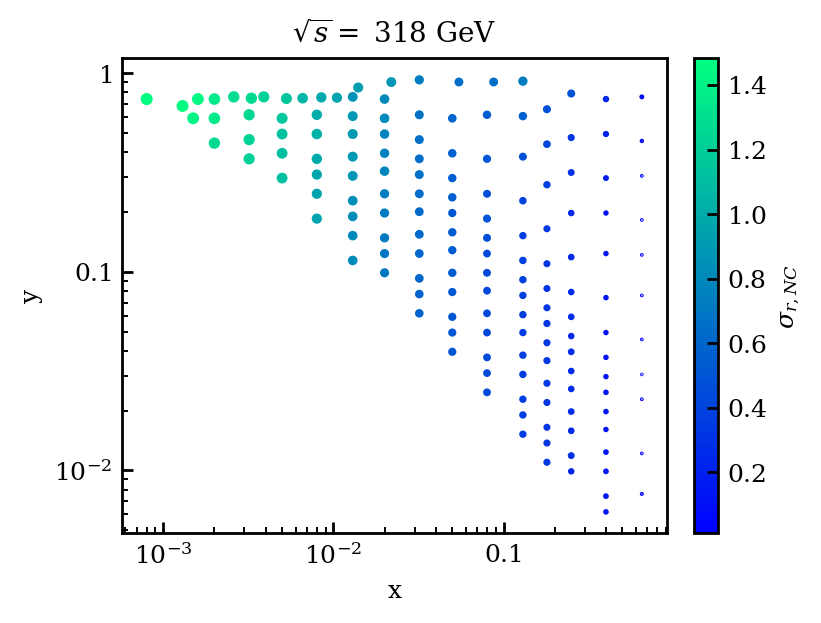

In [5]:
fig, ax = plt.subplots(figsize=(4, 3))

# cmap = cm.cool
cmap = cm.winter
sc = ax.scatter(
    data["x"],
    data["y"],
    s=data["Sigma"] * 30,
    c=data["Sigma"],
    cmap=cmap,
)
c = fig.colorbar(sc)
c.ax.set_ylabel("$\sigma_{r,NC}$")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_title("$\sqrt{s}=$" + f" {int(s ** 0.5)} GeV")

fig.savefig("hera_nc.svg", transparent=True, dpi=800)

plt.show()